# Classification

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

# Each of the 28x28=784 pixel's intensities are represented by a different feature with values from 0-255
# There are 70,000 images in the dataset
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

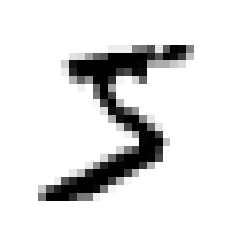

In [53]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
import numpy as np

y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

<Figure size 720x720 with 0 Axes>

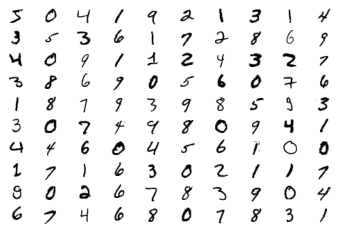

<Figure size 720x720 with 0 Axes>

In [7]:
for iy in range(10):
  for ix in range(10):
    idx = iy * 10 + ix
    
    plt.subplot(10, 10, idx + 1)
    plt.imshow(X[idx].reshape(28, 28), cmap="binary")
    plt.axis("off")

plt.figure(figsize=(10, 10))

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([X[35]])

array([ True])

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator

# Always false
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self

  def predict(self, X):
    return np.zeros((len(X), 1), dtype="bool")

never_5_clf = Never5Classifier()
# Over 90% accuracy because only <10% of the dataset consists of fives
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [16]:
from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
import joblib
# joblib.dump(y_train_pred, "Chapter 3/y_train_pred.pkl")
y_train_pred = joblib.load("Chapter 3/y_train_pred.pkl")

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold = 8000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

In [25]:
# y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
import joblib
# joblib.dump(y_scores, "Chapter 3/y_scores.pkl")
y_scores = joblib.load("Chapter 3/y_scores.pkl")

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

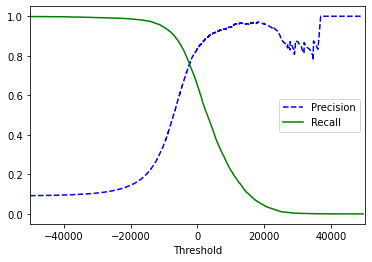

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g", label="Recall")
  plt.xlim([-50000, 50000])
  plt.legend()
  plt.xlabel("Threshold")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

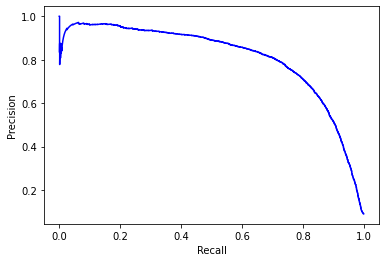

In [28]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, 'b')
  plt.xlabel("Recall")
  plt.ylabel("Precision")

plot_precision_vs_recall(precisions, recalls)

In [29]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3370.0194991439557

In [30]:
y_train_pred_90 = y_scores >= threshold_90_precision

In [31]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [32]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [33]:
from sklearn.svm import SVC

# svm_clf = SVC()
# svm_clf.fit(X_train, y_train)

import joblib
# joblib.dump(svm_clf, "Chapter 3/svm_clf.pkl")

svm_clf = joblib.load("Chapter 3/svm_clf.pkl")

In [34]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [35]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [36]:
np.argmax(some_digit_scores)

5

In [37]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [49]:
# sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train)
import joblib

# joblib.dump(sgd_clf, "Chapter 3/sgd_clf.pkl")
sgd_clf = joblib.load("Chapter 3/sgd_clf.pkl")

In [54]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [51]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [55]:
# cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [60]:
# y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
# joblib.dump(y_train_pred, "Chapter 3/sgd_clf_y_train_pred.pkl")
y_train_pred = joblib.load("Chapter 3/sgd_clf_y_train_pred.pkl")

In [61]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

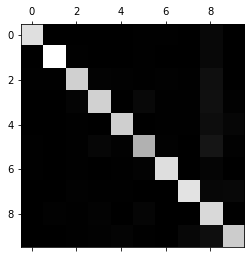

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

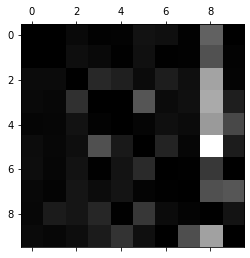

In [64]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [65]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [66]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [67]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
x_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [100]:
def plot_digit(digit):
  plt.imshow(digit.reshape(28, 28), cmap="binary")
  plt.axis("off")

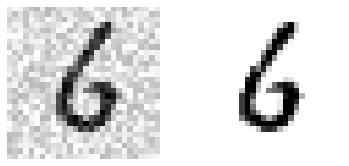

In [101]:
some_index = 50

plt.subplot(121)
plot_digit(x_test_mod[some_index])
plt.subplot(122)
plot_digit(y_test_mod[some_index])

In [102]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

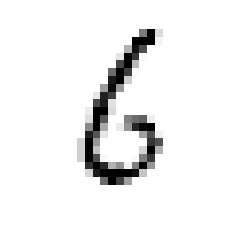

In [103]:
clean_digit = knn_clf.predict([x_test_mod[some_index]])
plot_digit(clean_digit)